# Central Limit Theorem (CLT) - Revisited

## 📚 Introduction to the CLT

ℹ️ You can skip this section of the `Recap - Central Limit Theorem - Revisited` if you had time to read it during the `Challenge - The Central Limit Theorem - A first approach`

**Two convergence theorems revolutionized the disciplines of probability and statistics:**
- **`LLN`: the Law of Large Numbers**
- **`CLT`: the Central Limit Theorem**

🧑🏻‍🏫 What is the CLT? According to [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)

> In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends towards a `Gaussian/normal distribution` (informally a `bell curve`) even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

## 🎯  Interpreting and Experimenting with the CLT

🎯  Let's illustrate how to use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in a dataset:

* Given a population, let's consider a feature (e.g. size, weight, salary, etc.) for each individual.


🚀  The important takeaway of these two theorems is that **whatever the shape of the distribution** of a given feature over the population, **the distribution of the (sampled) mean<u>S</u> tends to be Gaussian**:
* `the mean of the means` = $ \mu$ (Law of Large Numbers)
* `the standard deviation of the means` = $ \frac{\sigma}{\sqrt{n}} $  (Central Limit Theorem)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

💡  We can wrap it up the following way:

$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

Not convinced?  Play by yourself with this [no-code dataviz tool](https://seeing-theory.brown.edu/probability-distributions/) first! 
 (section CTL)

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/ctl_playground.png" width=500>


👩🏻‍🔬  Let's verify this experimentally with Python!

##  🚀 Let's get started!

👉 In this challenge, we will use the `tips` dataset from the `seaborn` library to illustrate the Central Limit Theorem.

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd
# Scientific libraries
import scipy.stats as stats
# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

❓ Load the `tips` dataset from `seaborn` into a `df` variable and display the first rows ❓

<details>
    <summary>Hint</summary>
    You can use <a href="https://seaborn.pydata.org/generated/seaborn.load_dataset.html"><code>seaborn.load_dataset()</code></a>
</details>

In [ ]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 🧐 Exploratory Data Analysis (EDA)

❓ How many rows are available in the dataset ❓

In [ ]:
len(df) # you can also use df.shape[0]

244

📊 Plot the distribution of the `total_bill` column in the restaurant.

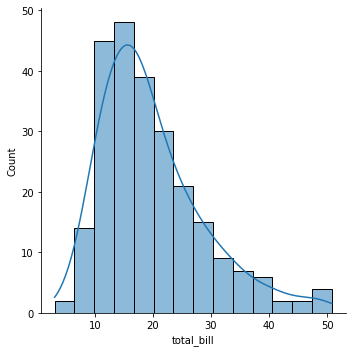

In [ ]:
sns.displot(x = "total_bill", data = df, kde = True)

❓ What is the [**skewness**](https://whatis.techtarget.com/definition/skewness) value of this distribution ❓

In [ ]:
df["total_bill"].skew()

1.1332130376158205

❓ Create two variables `mu` and `sigma` to store the mean and standard deviation of tips, respectively ❓

In [ ]:
mu = df["total_bill"].mean()
print(f"mu: {round(mu,2)}")

sigma = df["total_bill"].std()
print(f"sigma: {round(sigma,2)}")

mu: 19.79
sigma: 8.9


## 🎲 Sampling the Mean

👉 Pick randomly - and with replacement - 10 rows of the dataset, and compute the mean $ \bar{X} $ of this sample.

Run this cell a few times.
* Do you get the same result each time?
* Did you expect it?

In [ ]:
# df["total_bill"].sample(1000, replace=True).mean()
df["total_bill"].sample(5).mean()

17.332

👉 Create a `means` list storing a list of means of $N$ samples (each of them with size $n$).

Start with $n = 5$ and $N = 10$

📊 In the same cell, **plot** the distribution of `means`. 

🕵️‍♀️ Let's play with the *sample size n* and the *number of samples N*:
- `sample size`: Keep $N$ constant, `increase n`. What do you observe?
    - Plot a grid of 6 distributions playing with  $ n \in \{ 1, 5, 50, 100, 500, 1000 \}$
- `number of samples`:Then, keep $n$ constant and `increase N`. What do you observe?
    - Plot a grid of 6 distributions playing with  $ N \in \{ 10, 20, 30, 50, 100, 500 \}$

<b>Playing with the `sample size` $n$</b>:

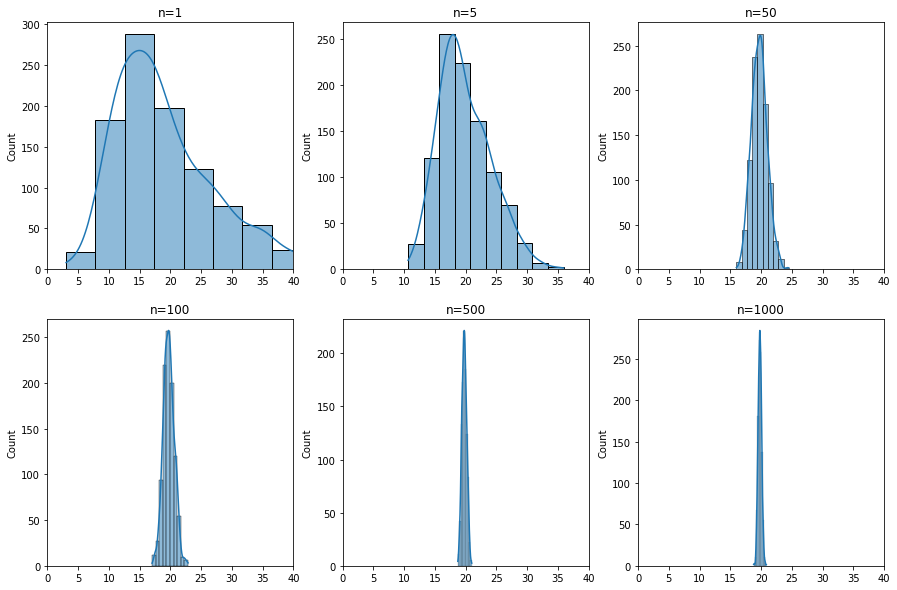

In [ ]:
# Number of customers in one sample
list_of_n = [1, 5, 50, 100, 500, 1000] 

# Number of CLT experiments
N = 1000

# Plot 6 graphs : 2 rows by 3 columns for the 6 values of n
fix,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))

for n,ax in zip(list_of_n,axes.flat):
    means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]
    ax.set_title(f"n={n}")
    ax.set_xlim(0, 40)
    sns.histplot(means,bins=10,ax=ax,kde=True)

💡 As *n* increases:
* the distribution of the means converges towards the theoretical mean $ \mu $ (LLN)
* the variance around $ \mu $ tends towards 0 (indeed: $ \large \frac{\sigma}{\sqrt{n}} \rightarrow_{n \rightarrow \infty} 0 $)

<b>Playing with the `number_of_samples` $N$</b>:

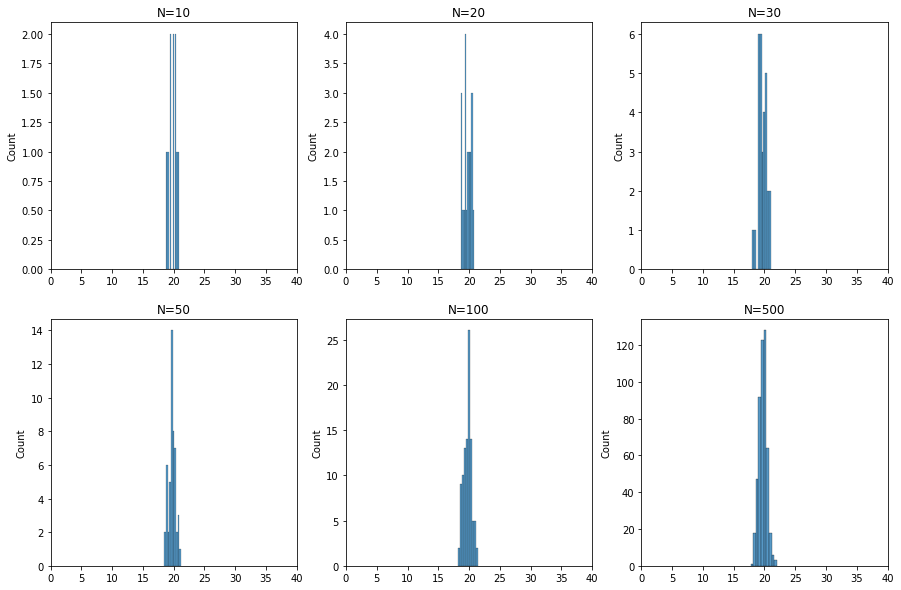

In [ ]:
# Number of customers in one sample
n = 200

# Number of samples
list_of_N = [10, 20, 30, 50, 100, 500]
 
# Plot 6 graphs : 2 rows by 3 columns for the 6 values of N
fix,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))

for N, ax in zip(list_of_N,axes.flat):
    means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]
    
    ax.set_title(f"N={N}")
    ax.set_xlim(0, 40)
    
    sns.histplot(means,bins=10,ax=ax)


💡 As *N* increases:
* the distribution of the means is less noisy

## 👩🏻‍💻 Verifying the CLT with Simulations:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

🔥 Let's verify the Central Limit Theorem computationally 

For each value of `n`:
- Compare `mu` with the mean of means
- Compare `sigma` with the standard deviation of the means (don't forget the $\sqrt n$ adjustment)
- Compute the `skewness` of the sampling distribution

In [ ]:
mu = df["total_bill"].mean()
sigma = df["total_bill"].std()
skew = df["total_bill"].skew()
kurtosis = df["total_bill"].kurtosis()

In [ ]:
print(f"mu: {round(mu,2)}")
print(f"sigma: {round(sigma,2)}")
print(f"skewness: {round(skew,2)}")
print(f"kurtosis: {round(kurtosis,2)}")

mu: 19.79
sigma: 8.9
skew: 1.13
kurtosis: 1.22


In [ ]:
N = 5000

list_of_n = [1, 5, 50, 100, 500, 1000, 5000, 10_000]

delta_mu = []
delta_sigma = []
skewness_history = []
kurtosis_history = []

for n in list_of_n:
    # sampling
    sampled_means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]
    
    # difference in theoretical expectation vs sampled expectation
    mu_diff = mu - np.mean(sampled_means)
    delta_mu.append(mu_diff)
    
    # difference in theoretical standard deviation vs. standard deviation
    sigma_diff = sigma / np.sqrt(n) - np.std(sampled_means)
    delta_sigma.append(sigma_diff)
    
    # skewness and kurtosis    
    skewnes_history.append(stats.skew(sampled_means))    
    kurtosis_history.append(stats.kurtosis(sampled_means))
    
results_from_simulation = pd.DataFrame(data ={"n":list_of_n,
                                              "𝚫mu":delta_mu,
                                             "𝚫sigma":delta_sigma,
                                             "skew":skewnes_history,
                                             "kurtosis":kurtosis_history,})

print(round(results_from_simulation,3).to_string(index = False))

    n    𝚫mu  𝚫sigma  skew  kurtosis
    1  0.078   0.105 1.089     1.052
    5  0.042   0.026 0.550     0.361
   50 -0.007   0.017 0.145     0.032
  100 -0.034  -0.004 0.077    -0.147
  500 -0.007   0.002 0.017    -0.023
 1000 -0.003   0.005 0.047     0.072
 5000  0.002   0.003 0.012    -0.056
10000  0.001   0.001 0.022    -0.043


## ⭐️ Real-life application of the CLT

👉 Let's consider `n` =  100 rows **sampled from the dataset**. What is the probability that the cumulated total bill is **lower than 1800€**? 

🚀 `n > 30` is enough to apply the Central Limit Theorem. The distribution of the sampled means follows a **`Gaussian Distribution`** (already referred to as a **`Normal Distribution`**)

<br>

❓ Plot the  **`pdf`** (a.k.a. `probability density function`) of the sampled means of the total bills. You can use ***[`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)***

$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$



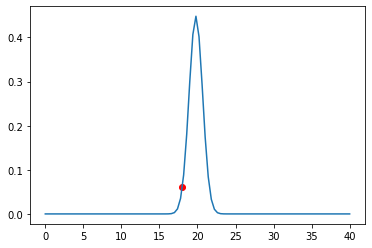

In [ ]:
### INPUTS
n = 100
target_total_cumulated_bills = 1800
target_mean = target_total_cumulated_bills / n # that is 18 euros


### DECLARING A GAUSSIAN VARIABLE
X_bar = stats.norm(mu, sigma / np.sqrt(n))
print(X_bar) 
'''
When you print X_bar, it says Scipy Stats RV, RV meaning Random Variable
'''


### PLOTTING THE PDF OF THE GAUSSIAN VARIABLE
x = np.linspace(0, 40, 100)
y = X_bar.pdf(x)
plt.plot(x, y)

### SHOWING THE TARGETETED AVERAGE BILL
plt.scatter(target_mean, X_bar.pdf(target_mean), c='r')

🧑🏻‍🏫 We'll revisit the concept of Gaussian Variable during the lecture `Statistical Inference`.

❓ What is the probability we are looking for? Use the `cdf` method to find it.

In [ ]:
X_bar.cdf(target_mean)

0.022421007000834294

❓ Compute the z-score for the value `18€`

In [ ]:
z = (target_mean - mu) / (sigma / np.sqrt(n))
z

-2.006133429914429

💡 This z-score actually confirms the probability we found above. Take a look at the [Standard Normal Table](https://en.wikipedia.org/wiki/Standard_normal_table); if you scroll through the rows and look for -2.00 (our z-score), you will see that it corresponds to **0.02275**, which is approximately the same value we have for our probability!

❓ Plot the normal distribution (0, 1) and a red dot for the target (use the `pdf`)

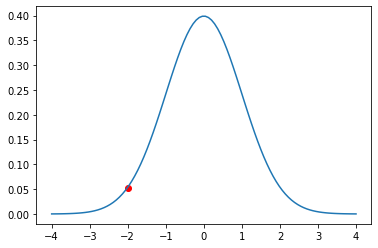

In [ ]:
true_norm = stats.norm(0, 1)

x = np.linspace(-4, 4, 100)
y = true_norm.pdf(x)

plt.plot(x, y)
plt.scatter(z, true_norm.pdf(z), c='r')

plt.show()

🏁 And...that's the end of this module for today!

💾 Again, you know the routine: `git add/commit/push`!

---

🎉 Massive congratulations for making it to the end of the Mathematics module! 


🤩 If you fell in love with maths, look at the following video: [**`The Map of Mathematics`**](https://www.youtube.com/watch?v=OmJ-4B-mS-Y) (11 min - 9M views on YouTube)



<img src="https://live.staticflickr.com/272/32264483720_c51bdde679_n.jpg">



---

📆 So, **how do you prepare yourself to enter the world of `Decision Science` now** ? 

- 🐍 **`Python for Data Science`** :
    - the more we progress through the bootcamp, the more you will have to be proficient in Python so that you can focus on the new Data Science concepts and not on the programming questions!
    - _Example_: think about a professional tennis player — before a game, he/she elaborates a strategy with the coach to beat the opponent, not to make a good serve or to do a top spin!
    
- 🔢 **`SQL`**:
    - Mastering database queries is at the heart of _any_ Data Science and Analytics job, even before Python for Data Analysts
    - It is fundamental that you master how to _join tables_ with SQL, we will re-use the concepts of _merging tables_ extensively with _Pandas_, and you will have to do it not only during your projects but also afterwards on your next job
    
- 🐼 **`Pandas/NumPy`**
    - The more of an expert you are at manipulating data with these two libraries, the more you can focus on adding value to your analysis 
    - The same way Excel masters will outshine their colleagues in Finance, Pandas/NumPy wizards will be much faster in focusing on handling new data
    
- 🧮 **`Maths`**:
    - `Algebra`: you must be comfortable dealing with matrices, DataFrames and NumPy Arrays! We will use them everywhere, even for Computer Vision and Image Preprocessing. We do not ask you to be an expert by taking a full Linear Algebra course like [MIT - Gilbert Strang - Linear Algebra](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/) (Open Source course on MIT OpenCourseWare) at university, but at least be proficient in getting and interpreting shapes of matrices, transposing, computing the inverse of a matrix, and matrix multiplication
    - `Probability and Statistics`: we will re-use the Gaussian Distribution and the Central Limit Theorem in the next module, so make sure you understood these concepts and write down all the remaining questions you would like to ask your teachers and TAs!

👉 These topics should be your priorities! Later, you can review challenges related to Data Visualization and Data Sourcing — for example, if you still have time after reviewing the priorities or before starting your Data Science Projects.


👋 See you soon ! 👋

---